In [28]:
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [29]:
paths = glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_*********_gfp-4x_000.tif")
paths = sorted(paths) # 1104 images in total
print(len(paths))

1104


In [30]:
calibrationCurvePaths = glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif")
calibrationCurvePaths = sorted(calibrationCurvePaths) # 9 sample images used to get an equation for Protein Concentration
calibrationCurvePaths

['/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/000ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/002ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/005ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/010ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/020ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/040ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/080ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/160ugml.tif',
 '/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/320ugml.tif']

UnboundLocalError: cannot access local variable 'proteinConcentration_List' where it is not associated with a value

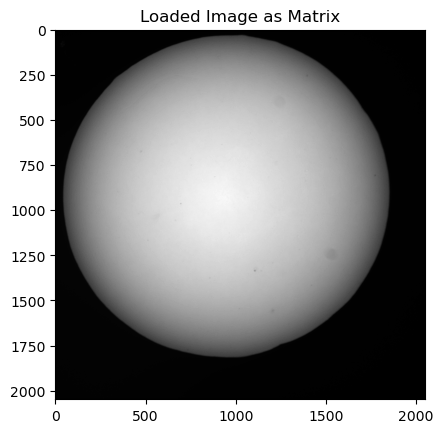

In [31]:

meanIntensity_List = list()
proteinConcentration_List = list()
meanIntensity_CalibrationCurve_List = list()

# This function utilizes the 2000 images taken for the experiment of the K401 motor protein
def calculateMeanIntensity(paths):

    for i in range(0,len(paths)): 

        # Load the image as a matrix
        image_path = paths[i]
        image_matrix = io.imread(image_path)

        # Display the image
        plt.imshow(image_matrix, cmap='gray')
        plt.title('Loaded Image as Matrix')

        print()
        meanIntensity = image_matrix.mean()
        meanIntensity_List.append(meanIntensity)

# This function utilizes 9 sample images to analyze the relationship between "Mean Intensity" and "Protein Concentration"
def getConcentration(calibrationCurvePaths): # This function takes a list of image paths, as an argument
    
    for i in range(0, len(calibrationCurvePaths)):

        # Load the image as a matrix
        image_path = calibrationCurvePaths[i]
        image_matrix = io.imread(image_path)

        # Display the image
        plt.imshow(image_matrix, cmap='gray')
        plt.title('Loaded Image as Matrix')

        print()
        meanIntensity = image_matrix.mean()
        meanIntensity_CalibrationCurve_List.append(meanIntensity) 

    meanIntensity_CalibrationCurve_List # This should have 9 values

    df = pd.DataFrame(meanIntensity_CalibrationCurve_List).reset_index() # Create a data frame 
    df = df.rename(columns={"index":"Protein Concentration (microgram / mililiter)", 0:"Mean Intensity"})
    sampleConcentration_Values = [0, 2, 5, 10, 20, 40, 80, 160, 320]
    df["Protein Concentration (microgram / mililiter)"] = sampleConcentration_Values

    # Get the equation (linear) of best fit for the Protein Concentration
    x = df["Protein Concentration (microgram / mililiter)"]
    y = df["Mean Intensity"]

    slope, intercept = np.polyfit(x,y,1) # Multiple return values is allowed in Python
    
    """
    line_of_best_fit = slope * x + intercept
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df["Protein Concentration (microgram / mililiter)"], df["Mean Intensity"], marker='o', linestyle='none', label='Data points')
    plt.plot(x, line_of_best_fit, label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
    plt.title('Mean Intensity vs Protein Concentration')
    plt.xlabel('Protein Concentration (microgram / milliliter)')
    plt.ylabel('Mean Intensity')
    plt.grid(True)
    plt.legend()
    plt.show()
    """

    # Transform the dependent variables

    for i in range(0, len(meanIntensity_List)):
        proteinConcentration = (meanIntensity_List[i] - intercept) / slope
        proteinConcentration_List.append(proteinConcentration)

def constructDataFrames(timeInterval):

    minimumIntensityValue = min(meanIntensity_List)
    adjustedMeanIntensity_List = [x - minimumIntensityValue for x in meanIntensity_List] # Subsract the minimum mean intensity value from ALL values
    print()
    print("Values of the mean intensities: ")
    print(adjustedMeanIntensity_List)
    print()

    minimumProteinConcentration = min(proteinConcentration_List)
    adjustedProteinConcentration_List = [x - minimumProteinConcentration for x in proteinConcentration_List]
    print("Values of the protein concentrations: ")
    print(adjustedProteinConcentration_List)
    print()

    df = pd.DataFrame(adjustedMeanIntensity_List).reset_index() # Create a data frame 
    df = df.rename(columns={"index":"Time (min)", 0:"Mean Intensity"})
    df["Time (min)"] = df["Time (min)"] * timeInterval # Manipulate the "time" values

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (min)'], df['Mean Intensity'], marker='o')
    plt.title('Mean Intensity vs Time')
    plt.xlabel('Time (t)')
    plt.ylabel('Mean Intensity')
    plt.grid(True)
    plt.show()

    df2 = pd.DataFrame(adjustedProteinConcentration_List).reset_index()
    df2 = df2.rename(columns={"index":"Time (min)", 0:"Protein Concentration (microgram / milliliter)"})
    df2["Time (min)"] = df2["Time (min)"] * timeInterval # Manipulate the "time" values

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df2['Time (min)'], df2['Protein Concentration (microgram / milliliter)'], marker='o')
    plt.title('Protein Concentration vs Time')
    plt.xlabel('Time (t)')
    plt.ylabel('Protein Concentration (microgram / milliliter)')
    plt.grid(True)
    plt.show()


print()
calculateMeanIntensity(paths) # 1st function to be called
getConcentration(calibrationCurvePaths) # 2nd function to be called
constructDataFrames(0.5) # Time interval is passed in minutes. # 3th function to be called



